# Use case: flowshop scheduling

This example is based on the paper from Tao et al. (2015), where authors present an introduction example. In a flow shop problem, a set of $n$ jobs has to be processed on $m$ different machines in the same order. Job $j$, $j=1,2,...,n$ is processed on machines $i$, $i=1,2,..,m$, with a nonnegative processing time $p(i,j)$ and a release date $r_j$, which is the earliest time when the job is permitted to process. Each machine can process at most one job and each job can be handled by at most one machine at any given time. The machine processes the jobs in a first come, first served manner. The goal is to determine a job sequence that minimizes the makespan.

The problem statement is:
<img src="img/flow_shop_problem.png" alt="problem definition" width="160"/>

The following solution is reported by the authors (order J1, J3, J4, J2, scheduled horizon: 29):
<img src="img/flow_shop_solution.png" alt="gantt solution" width="500"/>

In this notebook, we try to reproduce the results reported by the authors.

**Reference**

Tao Ren, Meiting Guo, Lin Lin, Yunhui Miao, "A Local Search Algorithm for the Flow Shop Scheduling Problem with Release Dates", Discrete Dynamics in Nature and Society, vol. 2015, Article ID 320140, 8 pages, 2015. https://doi.org/10.1155/2015/320140

### Imports

In [ ]:
# necessary for colab users
!pip install processscheduler==2.0.0

In [2]:
import processscheduler as ps

%config InlineBackend.figure_formats = ['svg']

### Create the scheduling problem
The total horizon is unknwown, leave it empty and only set the problem name.

In [3]:
flow_shop_problem = ps.SchedulingProblem(name="FlowShop")

### Create the 3 machines M1, M2 and M3

In [4]:
M3 = ps.Worker(name="M3")
M2 = ps.Worker(name="M2")
M1 = ps.Worker(name="M1")

### Create jobs J1, J2, J3 and J4 - related tasks

In [5]:
# J1
J11 = ps.FixedDurationTask(name="J11", duration=2)
J12 = ps.FixedDurationTask(name="J12", duration=5)
J13 = ps.FixedDurationTask(name="J13", duration=6)

# J2
J21 = ps.FixedDurationTask(name="J21", duration=1)
J22 = ps.FixedDurationTask(name="J22", duration=5)
J23 = ps.FixedDurationTask(name="J23", duration=7)

# J3
J31 = ps.FixedDurationTask(name="J31", duration=1)
J32 = ps.FixedDurationTask(name="J32", duration=4)
J33 = ps.FixedDurationTask(name="J33", duration=1)

# J4
J41 = ps.FixedDurationTask(name="J41", duration=3)
J42 = ps.FixedDurationTask(name="J42", duration=4)
J43 = ps.FixedDurationTask(name="J43", duration=7)

### Assign resources
One machine per task.

In [6]:
J11.add_required_resource(M1)
J12.add_required_resource(M2)
J13.add_required_resource(M3)

J21.add_required_resource(M1)
J22.add_required_resource(M2)
J23.add_required_resource(M3)

J31.add_required_resource(M1)
J32.add_required_resource(M2)
J33.add_required_resource(M3)

J41.add_required_resource(M1)
J42.add_required_resource(M2)
J43.add_required_resource(M3)

### Constraint: release dates

In [7]:
r1 = 0
r2 = 9
r3 = 2
r4 = 7

ps.TaskStartAfter(task=J11, value=r1)
ps.TaskStartAfter(task=J12, value=r1)
ps.TaskStartAfter(task=J13, value=r1)

ps.TaskStartAfter(task=J21, value=r2)
ps.TaskStartAfter(task=J22, value=r2)
ps.TaskStartAfter(task=J23, value=r2)

ps.TaskStartAfter(task=J31, value=r3)
ps.TaskStartAfter(task=J32, value=r3)
ps.TaskStartAfter(task=J33, value=r3)

ps.TaskStartAfter(task=J41, value=r4)
ps.TaskStartAfter(task=J42, value=r4)
ps.TaskStartAfter(task=J43, value=r4)

TaskStartAfter_19778063(<class 'processscheduler.task_constraint.TaskStartAfter'>)
1 assertion(s):
J43_start >= 7

### Constraints: precedences
All jobs should be scheduled in the same ordre on each machine. The constraint is expressed as following: all J2 tasks must be scheduled before Or after J2 tasks, AND all J3 tasks must be scheduled before OR oafter J1 tasks etc.

In [8]:
J1 = [J11, J12, J13]
J2 = [J21, J22, J23]
J3 = [J31, J32, J33]
J4 = [J41, J42, J43]

# we need to combinations function of the itertools module,
# to compute all pairs from the list of jobs.
from itertools import combinations

for Ja, Jb in combinations([J1, J2, J3, J4], 2):
    befores = []
    afters = []
    for i in range(3):
        Ja_before_Jb = ps.TaskPrecedence(task_before=Ja[i], task_after=Jb[i])
        Ja_after_Jb = ps.TaskPrecedence(task_before=Jb[i], task_after=Ja[i])
        befores.append(Ja_before_Jb)
        afters.append(Ja_after_Jb)
    ps.Xor(
        constraint_1=ps.And(list_of_constraints=befores),
        constraint_2=ps.And(list_of_constraints=afters),
    )

### Add  a makespan objective

In [9]:
makespan_obj = ps.ObjectiveMinimizeMakespan()

### Solution, plot the schedule

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 28 elapsed time:0.020s

Checking better value < 28

Found value: 27 elapsed time:0.021s

Checking better value < 27

Found value: 26 elapsed time:0.021s

Checking better value < 26

Found value: 25 elapsed time:0.021s

Checking better value < 25

Found value: 24 elapsed time:0.022s

Checking better value < 24

Found value: 23 elapsed time:0.022s

Checking better value < 23

Found value: 22 elapsed time:0.023s

Checking better value < 22

Found value: 21 elapsed time:0.023s

Checking better value < 21

Can't find a better solution for problem FlowShop.

Found optimum 21. Stopping iteration.

total number of iterations: 9

value: 21

FlowShop satisfiability checked in 0.02s

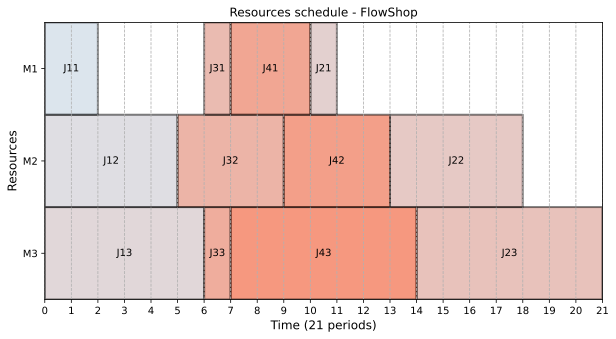

In [10]:
solver = ps.SchedulingSolver(problem=flow_shop_problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution, fig_size=(10, 5), render_mode="Resource")

We confirm the job sort from Tao et al. (2015) (J1 then J3, J4 and finally J2). The horizon is here only 21.